In [25]:
import xarray as xr 
import pandas as pd


In [26]:
training = pd.read_csv("../studies/devries2024/data/obs_env.csv")

training = training[(training['lat']>30)&(training['lat']<35)]
training = training[(training['lon']>-68)&(training['lon']<-62)]
training.set_index(['depth', 'time'], inplace=True)
training = training.groupby(level=training.index.names).mean()

In [27]:
predictions = xr.open_dataset("/home/phyto-2/Abil_SDM_data/env_data.nc")
predictions = predictions[['temperature', 'PAR', 'no3']].to_dataframe()
predictions.reset_index(inplace=True)
predictions = predictions[(predictions['lat']>30)&(predictions['lat']<35)]
predictions = predictions[(predictions['lon']>-68)&(predictions['lon']<-62)]
predictions.set_index(['depth', 'time'], inplace=True)
predictions = predictions.groupby(level=predictions.index.names).mean()

In [28]:
print(predictions)

             lat   lon  temperature         PAR       no3
depth time                                               
0     1     32.5 -65.0    20.480382   47.544392  0.447003
      2     32.5 -65.0    19.679150   62.271032  0.472148
      3     32.5 -65.0    19.515989   84.785172  0.359545
      4     32.5 -65.0    19.847053  108.528159  0.080228
      5     32.5 -65.0    21.521926  121.745899  0.123503
...          ...   ...          ...         ...       ...
200   8     32.5 -65.0    18.549183    0.029558  2.531244
      9     32.5 -65.0    18.647001    0.020453  2.677839
      10    32.5 -65.0    18.662934    0.007508  2.300400
      11    32.5 -65.0    18.753179    0.001514  2.345737
      12    32.5 -65.0    18.789104    0.000373  2.302063

[492 rows x 5 columns]


In [29]:
predictions = predictions[['temperature', 'PAR', 'no3']]
print(predictions)

training = training[['Emiliania huxleyi', 'Florisphaera profunda', 'Umbellosphaera irregularis']]
print(training)


            temperature         PAR       no3
depth time                                   
0     1       20.480382   47.544392  0.447003
      2       19.679150   62.271032  0.472148
      3       19.515989   84.785172  0.359545
      4       19.847053  108.528159  0.080228
      5       21.521926  121.745899  0.123503
...                 ...         ...       ...
200   8       18.549183    0.029558  2.531244
      9       18.647001    0.020453  2.677839
      10      18.662934    0.007508  2.300400
      11      18.753179    0.001514  2.345737
      12      18.789104    0.000373  2.302063

[492 rows x 3 columns]
            Emiliania huxleyi  Florisphaera profunda  \
depth time                                             
0     1          37005.250000                    NaN   
      2          36169.333333              95.000000   
      3          27540.500000                    NaN   
      4          67994.000000                    NaN   
      5           7034.000000             

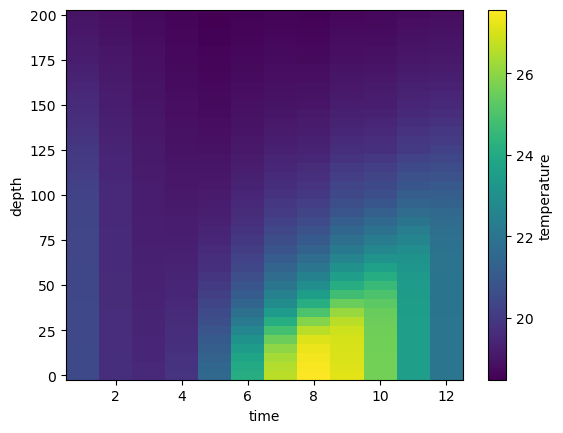

In [30]:
predictions = predictions.dropna()

ds = predictions.to_xarray()
ds['temperature'].plot()

In [31]:
d = pd.concat([predictions, training], axis=1)

print(d)

print(d)
d = d.dropna(subset=['temperature', 'no3', 'PAR'])
d[['temperature', 'no3', 'PAR']].to_csv("../docs/examples/data/prediction.csv")

training = d[['Emiliania huxleyi', 'Florisphaera profunda', 'Umbellosphaera irregularis', 'temperature', 'no3', 'PAR']]
training = training.dropna(subset= ['Emiliania huxleyi', 'Florisphaera profunda', 'Umbellosphaera irregularis'], how="all")
training.to_csv("../docs/examples/data/training.csv")

            temperature         PAR       no3  Emiliania huxleyi  \
depth time                                                         
0     1       20.480382   47.544392  0.447003       37005.250000   
      2       19.679150   62.271032  0.472148       36169.333333   
      3       19.515989   84.785172  0.359545       27540.500000   
      4       19.847053  108.528159  0.080228       67994.000000   
      5       21.521926  121.745899  0.123503        7034.000000   
...                 ...         ...       ...                ...   
200   8       18.549183    0.029558  2.531244                NaN   
      9       18.647001    0.020453  2.677839         126.000000   
      10      18.662934    0.007508  2.300400         801.000000   
      11      18.753179    0.001514  2.345737         126.000000   
      12      18.789104    0.000373  2.302063         503.000000   

            Florisphaera profunda  Umbellosphaera irregularis  
depth time                                         

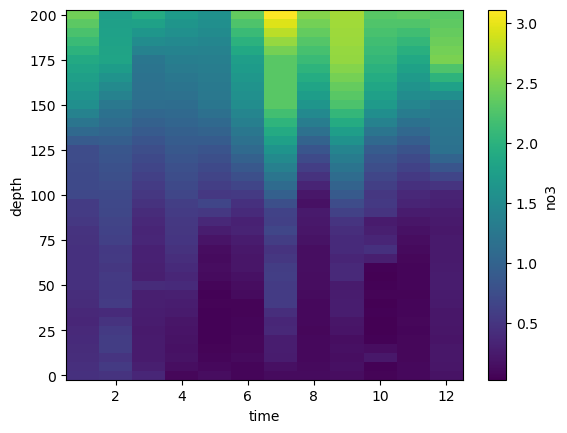

In [32]:
predictions = pd.read_csv("../docs/examples/data/prediction.csv")
predictions.set_index(["depth", "time"], inplace=True)
ds = predictions.to_xarray()
ds['no3'].plot()

            Emiliania huxleyi  Florisphaera profunda  \
depth time                                             
0     1          37005.250000                    NaN   
      2          36169.333333              95.000000   
      3          27540.500000                    NaN   
      4          67994.000000                    NaN   
      5           7034.000000                    NaN   
...                       ...                    ...   
200   8                   NaN           12082.000000   
      9            126.000000            1048.666667   
      10           801.000000            6762.500000   
      11           126.000000            3440.000000   
      12           503.000000            3398.000000   

            Umbellosphaera irregularis  temperature       no3         PAR  
depth time                                                                 
0     1                          285.5    20.480382  0.447003   47.544392  
      2                          190.0    1

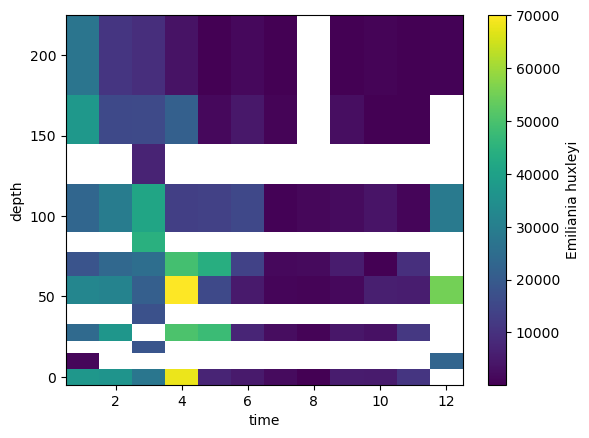

In [33]:
training = pd.read_csv("../docs/examples/data/training.csv")
training.set_index(["depth", "time"], inplace=True)
print(training)
ds = training.to_xarray()
ds['Emiliania huxleyi'].plot()

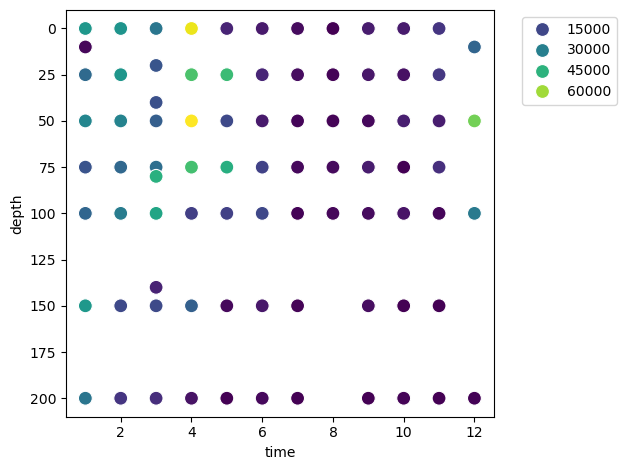

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
sns.scatterplot(data=training, x="time", y="depth", 
                hue="Emiliania huxleyi", palette="viridis", s=100)

# Flip the y-axis
plt.gca().invert_yaxis()

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
ds = xr.open_dataset("../docs/examples/ModelOutput/2-phase/posts/2-phase_model_mean.nc")
print(ds)

<xarray.Dataset>
Dimensions:                     (depth: 41, time: 12)
Coordinates:
  * depth                       (depth) int64 0 5 10 15 20 ... 185 190 195 200
  * time                        (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Umbellosphaera irregularis  (depth, time) float64 ...
Attributes:
    Conventions:  CF-1.5


In [40]:

ds = xr.open_dataset("../docs/examples/ModelOutput/2-phase/predictions/ens/Emiliania_huxleyi.nc")
print(ds)

print(ds['target'].values)

<xarray.Dataset>
Dimensions:  (depth: 41, time: 12)
Coordinates:
  * depth    (depth) int64 0 5 10 15 20 25 30 35 ... 170 175 180 185 190 195 200
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mean     (depth, time) float64 ...
    sd       (depth, time) float64 ...
    median   (depth, time) float64 ...
    ci95_LL  (depth, time) float64 ...
    ci95_UL  (depth, time) float64 ...
    target   object ...
Emiliania huxleyi


KeyError: 'depth'

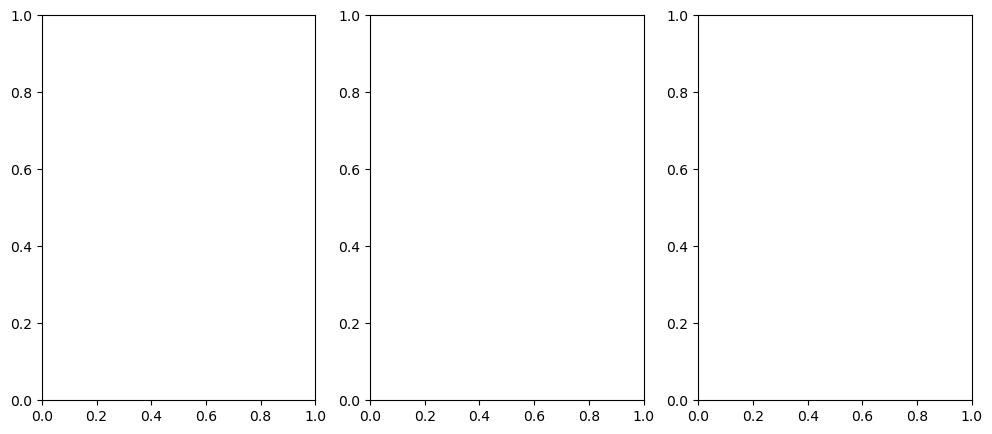

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_species_facetgrid(data, species_list):
    # Determine the number of subplots
    n_species = len(species_list)
    fig, axes = plt.subplots(1, n_species, figsize=(4 * n_species, 5), sharex=True)

    # Ensure axes is iterable
    if n_species == 1:
        axes = [axes]

    for ax, species in zip(axes, species_list):
        # Create a pivot table for each species
        pivot_table = data.pivot(index="depth", columns="time", values=species)

        # Plotting
        c = ax.pcolormesh(pivot_table.columns, pivot_table.index, pivot_table, shading='auto')

        # Flip the depth axis
        ax.invert_yaxis()

        # Labels and title
        ax.set_xlabel('Time')
        ax.set_ylabel('Depth')
        ax.set_title(species)

        # Add individual colorbars below each subplot
        cbar = fig.colorbar(c, ax=ax, orientation='horizontal', fraction=0.05, pad=0.2)
        cbar.set_label(f'{species} Abundance')

    plt.tight_layout()
    plt.show()

# Example usage:
species = ['Emiliania huxleyi', 'Florisphaera profunda', 'Umbellosphaera irregularis']
plot_species_facetgrid(d, species)
